# Logistic regression in Python with Scikit-Learn

This notebook is a tutorial for a basic supervied learning technique which is a logistic regression. It's a classification model rather than regression. Logistic regression is simple and efficient for binary classification. It works also for multiclass classification. 

In this notebook we will use a  a highly optimized version of logistic regression, implemented in scikit-learn. This model will be applied on a dataset for different patient to predict whether or not they have diabetes.

### 1. Importing libraries 

In [33]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

### 2. Importing the data 

In [2]:
df = pd.read_csv('diabetes.csv') # importation via pandas

### 3. Understand the data 

In [3]:
df.shape #it returns the dimension of the dataset (rows, columns)

(768, 9)

In [4]:
df.head() # by default, head dunction shows the first 5 rows. to show n rows, we type : df.head(n)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4. Predicting model 


First, we will start by dividing the data into features and labels: separating the dependent variable from the independent variables.

In [6]:
x = df.iloc[:, 1:-1].values # label 
y = df.iloc[:, -1].values # features

Here, we will split our data into training and test data.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) # 80%data for train and 20% for test

#### Scaling the data :
Scaling is bringing all the values for all features between -1 and 1. Some machine learning models are influenced by whether the data is scaled or not and logistic regression is one of them. 

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Creating and training the logistic model 

In [9]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

#### Predicting results
For our binary classification problem, we have four possible classifications outcome:

    - predict 1 while it's in reality 1 : True positive TP
    - predict 1 while it's in reality 0 : False positive FP
    - predict 0 while it's in reality 0 : True negative TN
    - predict 0 while it's in reality 1 : False negative NP 
The confusion metrix is as below :
$$\begin{bmatrix}
TP & FN\\ 
FP & TN
\end{bmatrix}$$

For the evaluation of our model we have different metrics:

    - Accuracy : number of correct classifications/total number of classifications 
$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

    - Recall : number of positive correct classifications/total number of actual positive 
$$Recall=\frac{TP}{TP+FN}$$

    - Precision : number of positive correct classifications/total number of predicted positive 
$$Precision=\frac{TP}{TP+FP}$$

    - F1 score :  
$$Accuracy=2.\frac{Recall .Precision}{Recall+Precision}$$
    
    
    - ROC AUC : it measures the area under curve for the Roc curve. the model is better when the AUC is bigger.

In [46]:
predictions = classifier.predict(x_test)
predictions_probs = classifier.predict_proba(x_test)[:, 1]
cm = confusion_matrix(predictions, y_test)
print('- Confusion matrix : \n', cm)
print('- Accuracy score : ', round(accuracy_score(y_test, predictions), 2))
print('- Recall score : ', round(recall_score(y_test, predictions), 2))
print('- Precision score : ', round(precision_score(y_test, predictions), 2))
print('- F1 score : ', round(f1_score(y_test, predictions), 2))
print('- ROC AUC : ', round(roc_auc_score(y_test, predictions_probs), 2))

- Confusion matrix : 
 [[96 19]
 [11 28]]
- Accuracy score :  0.81
- Recall score :  0.6
- Precision score :  0.72
- F1 score :  0.65
- ROC AUC :  0.85


* Roc Curve

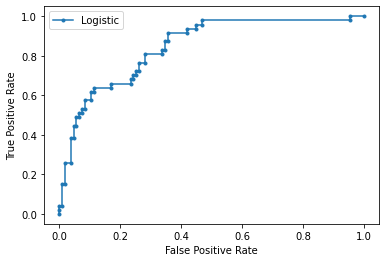

In [64]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, predictions_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

* Recall-precision curve

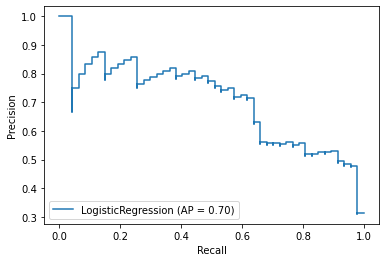

In [15]:
disp = plot_precision_recall_curve(classifier, x_test, y_test)

* How to choose the best threshold with maximizing the accuracy score ?

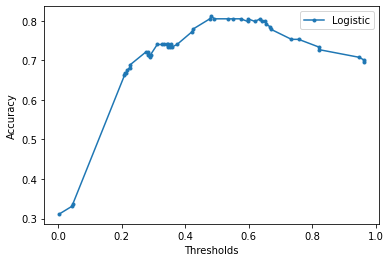

In [63]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(predictions_probs>thres,1,0)
    # Apply desired utility function to y_preds, for example accuracy.
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
pyplot.plot(thresholds[1:], accuracy_ls[1:], marker='.', label='Logistic')
pyplot.xlabel('Thresholds')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

* From the last curve, the best threshold is around 0.5 and 0.7.